In [106]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Читать изображение и изменять его размер

584 1200


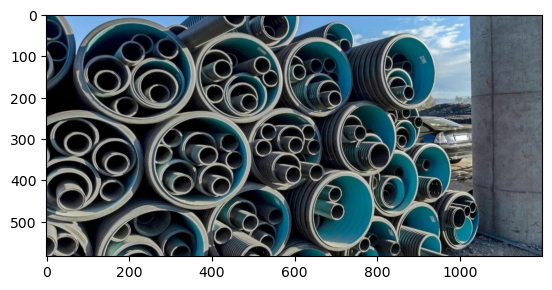

In [107]:
image = cv.imread(r"D:\Projects\Pycharm_projects\CV\lab02\task2\pipes-6.jpg")
src = cv.cvtColor(image, cv.COLOR_BGR2RGB)
height, width = src.shape[:2]
new_height = int(height *0.93)
src= cv.resize(src, (width, new_height), interpolation=cv.INTER_LINEAR)
plt.imshow(src)
height, width = src.shape[:2]
print(height, width)

# Преобразовать в черно-белое изображение

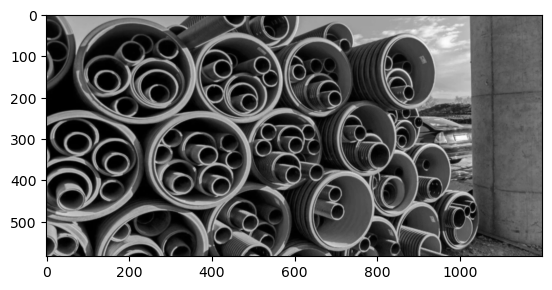

In [108]:
plt.imshow(src)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray, 'gray')
plt.show()

# Обрезать изображение

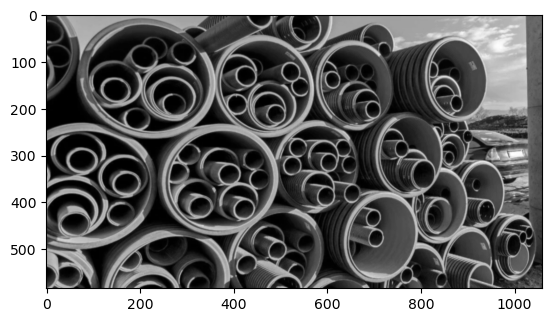

In [109]:
import matplotlib.pyplot as plt

x1 = 0
y1 = 0
x2 = 1060
y2 =height

cut = gray[y1:y2, x1:x2]

plt.imshow(cut, cmap='gray')
plt.show()

# Использовать преобразование Хафа (cv.HOUGH_GRADIENT) для обнаружения кругов на изображении

Total pipes:  98


(-0.5, 1199.5, 583.5, -0.5)

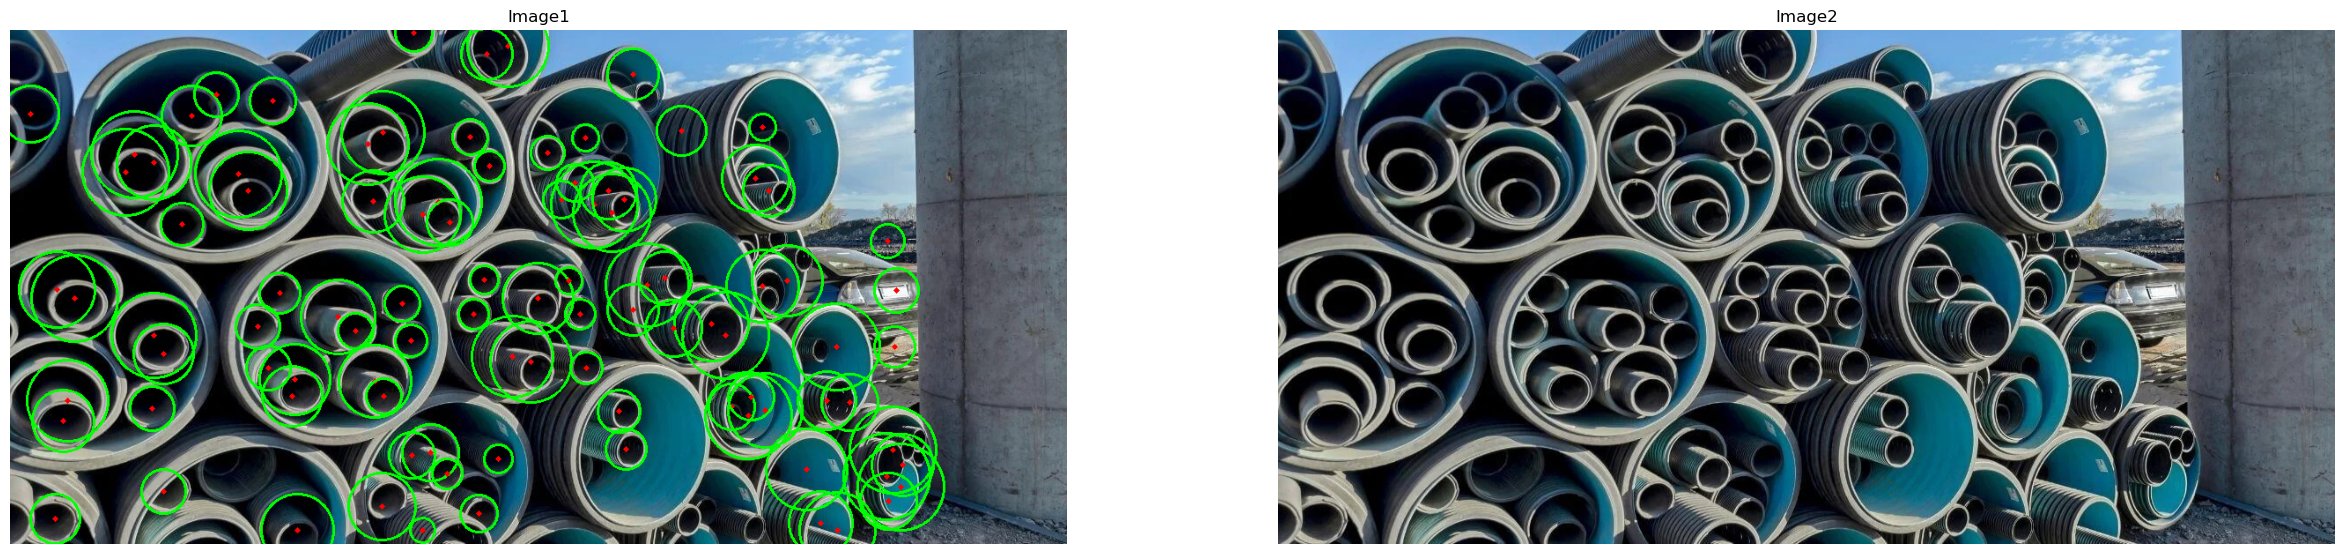

In [120]:
detected_circles = cv.HoughCircles(
    cut,
    cv.HOUGH_GRADIENT,
    1.1,  
    20, 
    param1=100,  
    param2=44,   
    minRadius=2, maxRadius=50
)

'''detected_circles = cv.HoughCircles(
    cut,                         # 灰度图像
    HOUGH_GRADIENT_ALT,           # 使用的霍夫变换方法
    1.5,                          # 累积器分辨率与图像分辨率的比例
    38,                           # 检测到的圆心之间的最小距离
    param1=250,                   # 边缘检测的高阈值
    param2=0.75,                   # 圆形检测的累积器阈值
    minRadius=10, maxRadius=120  # 圆形半径的最小值和最大值
)'''

image = src.copy()
pipes_count = 0

if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))  

    for points in detected_circles[0, :]:
        a, b, r = points[0] , points[1] , points[2]  

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1


print("Total pipes: ", pipes_count)


fig, axs = plt.subplots(1, 2, figsize=(30, 15))

axs[0].imshow(image)
axs[0].set_title('Image1')
axs[0].axis('off')  

cut1 = image[y1:y2, x1:x2]

axs[1].imshow(src, cmap='gray')
axs[1].set_title('Image2')
axs[1].axis('off')  